# MODEL ABC_corr (original ATM model)
## ABCs for correct trials only
## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])

In [1]:
import os
from glob import glob
import nibabel as nb
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_palette('muted')

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
#sids = ['WMAZE_001']

proj_dir = '/home/data/madlab/data/mri/wmaze' 
mask_files = []
cope_files = []

for SID in sids:
    mask_files_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*') #get masks
    mask_files.append(sorted(mask_files_glob)) #append masks        
    subjcopes_glob = glob(proj_dir + '/scndlvl/model_ABC/' + SID + '/fixedfx/cope_*') #get copes
    subjcopes_glob = [f for f in subjcopes_glob if "_corr" in f] 
    cope_files.append(sorted(subjcopes_glob)) #append copes
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 3: #check to makes sure correct number of copes
        print(SID)

## Cell to double-check the array indexing

In [ ]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_files[0]): #check masks
    print(i, mask_files[0][i].split('/')[-1][:-7])

In [ ]:
for i, curr_cope in enumerate(cope_files[0]): #check copes
    print(i, cope_files[0][i].split('/')[-1][5:-7]) 

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [2]:
bihp_fb4c = {'A':[], 'B':[], 'C':[]} #bihemispheric masked activation
biput_fb4c = {'A':[], 'B':[], 'C':[]}

for i in range(len(sids)):
    lh_hp_img = nb.load(mask_files[i][2]) #HPC masks
    rh_hp_img = nb.load(mask_files[i][11])
    lh_put_img = nb.load(mask_files[i][16])
    rh_put_img = nb.load(mask_files[i][17])

    A_img = nb.load(cope_files[i][0]) #second level copes for each trial type
    B_img = nb.load(cope_files[i][1])
    C_img = nb.load(cope_files[i][2])
  
    for key in bihp_fb4c: #get the activation for each cope only within mask ROI
        lh_data = eval('np.mean({0}_img.get_data()[lh_hp_img.get_data() > 0.])'.format(key))            
        rh_data = eval('np.mean({0}_img.get_data()[rh_hp_img.get_data() > 0.])'.format(key))
        bihp_fb4c['{0}'.format(key)].append((lh_data + rh_data)/2.) #combine hemispheres
        
    for key in biput_fb4c: 
        lh_data = eval('np.mean({0}_img.get_data()[lh_put_img.get_data() > 0.])'.format(key))            
        rh_data = eval('np.mean({0}_img.get_data()[rh_put_img.get_data() > 0.])'.format(key))
        biput_fb4c['{0}'.format(key)].append((lh_data + rh_data)/2.) 

bihp_fb4c_df = pd.DataFrame(bihp_fb4c) #convert to Pandas dataframe  
biput_fb4c_df = pd.DataFrame(biput_fb4c)

# Hippocampus

In [ ]:
print stats.shapiro(bihp_fb4c_df['A']) #check the normality of each distribution
print stats.shapiro(bihp_fb4c_df['B'])
print stats.shapiro(bihp_fb4c_df['C'])

In [ ]:
bihp_fb4c_df #display dataframe to copy for SPSS

Mean A:  -1.10266039409
STD A:  1.95997042818

Mean B:  -1.88170867264
STD B:  2.05941975995

Mean C:  -1.26636027396
STD C:  2.00324921885

A vs B Ttest_relResult(statistic=4.1171352851692324, pvalue=0.0005863516000024591)
C vs B Ttest_relResult(statistic=3.5983257856745632, pvalue=0.0019157301395925416)
A vs C Ttest_relResult(statistic=0.93452617325105658, pvalue=0.36175853185150819)


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


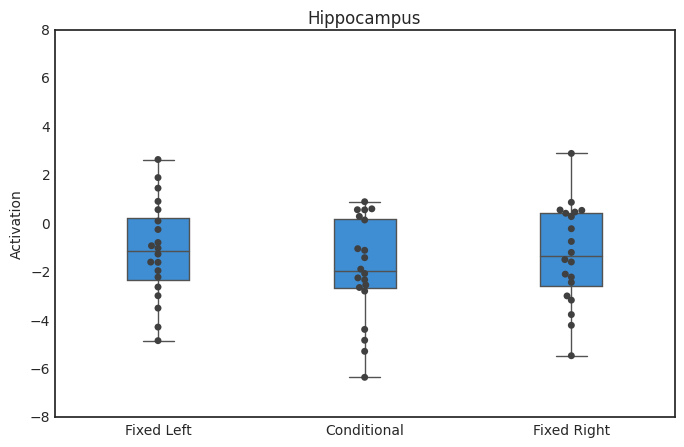

In [3]:
sns.set_style("white")
for key in bihp_fb4c_df: #print the mean and std for each trial type
    print "Mean {0}: ".format(key), np.mean(bihp_fb4c_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(bihp_fb4c_df['{0}'.format(key)])
    print ""
print "A vs B", stats.ttest_rel(bihp_fb4c_df['A'], bihp_fb4c_df['B'])
print "C vs B", stats.ttest_rel(bihp_fb4c_df['C'], bihp_fb4c_df['B'])
print "A vs C", stats.ttest_rel(bihp_fb4c_df['A'], bihp_fb4c_df['C'])
N = 3
conditions = ['Fixed Left', 'Conditional', 'Fixed Right']
hp_allsubjs = [bihp_fb4c_df['A'], bihp_fb4c_df['B'], bihp_fb4c_df['C']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3) #display boxplot
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25') #display swarmplot
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Activation")
ax.set_title("Hippocampus")
ax.set_ylim(-8,8)
plt.show()

# Putamen

In [ ]:
print stats.shapiro(biput_fb4c_df['A']) #check the normality of each distribution
print stats.shapiro(biput_fb4c_df['B'])
print stats.shapiro(biput_fb4c_df['C'])

In [ ]:
biput_fb4c_df

In [ ]:
for key in biput_fb4c_df: #print the mean and std for each trial type
    print "Mean {0}: ".format(key), np.mean(biput_fb4c_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(biput_fb4c_df['{0}'.format(key)])
    print ""
print "A vs B", stats.ttest_rel(biput_fb4c_df['A'], biput_fb4c_df['B'])
print "C vs B", stats.ttest_rel(biput_fb4c_df['C'], biput_fb4c_df['B'])
print "A vs C", stats.ttest_rel(biput_fb4c_df['A'], biput_fb4c_df['C'])
N = 3
conditions = ['Fixed Left', 'Conditional', 'Fixed Right']
put_allsubjs = [biput_fb4c_df['A'], biput_fb4c_df['B'], biput_fb4c_df['C']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = put_allsubjs, color = "#c34aef", width = 0.3) #display boxplot
ax2 = sns.swarmplot(data = put_allsubjs, color='.25') #display swarmplot
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Activation")
ax.set_title("Putamen")
ax.set_ylim(-8,8)
plt.show()